# NOTE:
# The dataset is stored in my Google Drive at /content/drive/MyDrive/.../
# It is automatically loaded from Drive when running the notebook.
# Dataset is not uploaded to GitHub due to size limitations.


In [1]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

Mounted at /content/drive


In [2]:
!ls /content/drive/MyDrive/Twitter_Sentiment_Analysis

rnn_twitter_sentiment_model.h5	twitter_training.csv  twitter_validation.csv


Mounted at /content/drive
rnn_twitter_sentiment_model.h5	twitter_training.csv  twitter_validation.csv
      0            1         2  \
0  2401  Borderlands  Positive   
1  2401  Borderlands  Positive   
2  2401  Borderlands  Positive   
3  2401  Borderlands  Positive   
4  2401  Borderlands  Positive   

                                                   3  
0  im getting on borderlands and i will murder yo...  
1  I am coming to the borders and I will kill you...  
2  im getting on borderlands and i will kill you ...  
3  im coming on borderlands and i will murder you...  
4  im getting on borderlands 2 and i will murder ...  
Epoch 1/5


/usr/local/lib/python3.12/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


956/956 ━━━━━━━━━━━━━━━━━━━━ 217s 224ms/step - accuracy: 0.3572 - loss: 1.0966 - val_accuracy: 0.3213 - val_loss: 1.1029
Epoch 2/5
956/956 ━━━━━━━━━━━━━━━━━━━━ 208s 218ms/step - accuracy: 0.3661 - loss: 1.0948 - val_accuracy: 0.3213 - val_loss: 1.1090
Epoch 3/5
956/956 ━━━━━━━━━━━━━━━━━━━━ 207s 216ms/step - accuracy: 0.3680 - loss: 1.0950 - val_accuracy: 0.3213 - val_loss: 1.1051
Epoch 4/5
956/956 ━━━━━━━━━━━━━━━━━━━━ 209s 219ms/step - accuracy: 0.3652 - loss: 1.0953 - val_accuracy: 0.3213 - val_loss: 1.1040
Epoch 5/5
956/956 ━━━━━━━━━━━━━━━━━━━━ 262s 219ms/step - accuracy: 0.3652 - loss: 1.0951 - val_accuracy: 0.3213 - val_loss: 1.1051
26/26 - 1s - 42ms/step - accuracy: 0.3213 - loss: 1.1051

✅ Validation Accuracy: 32.13%


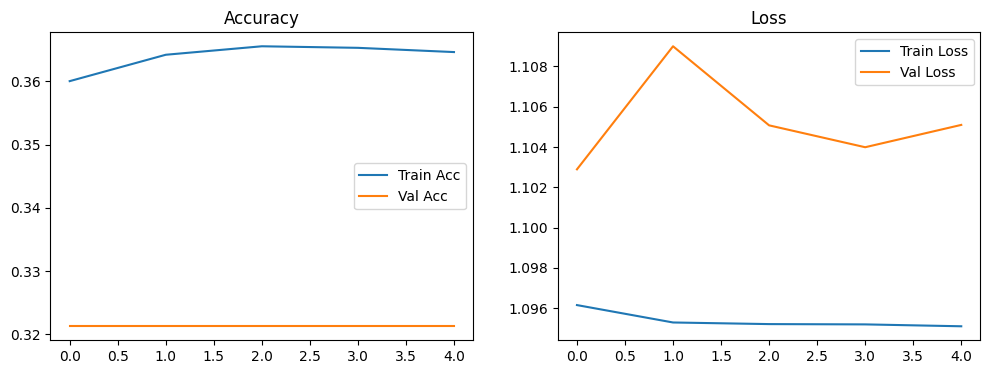

✅ Model saved successfully to Google Drive at:
/content/drive/MyDrive/Twitter_Sentiment_Analysis/rnn_twitter_sentiment_model.h5


In [3]:
from google.colab import drive
drive.mount('/content/drive', force_remount=True)

!ls /content/drive/MyDrive/Twitter_Sentiment_Analysis

import pandas as pd
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense, Dropout
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
import matplotlib.pyplot as plt


base_path = '/content/drive/MyDrive/Twitter_Sentiment_Analysis'


train_df = pd.read_csv(f'{base_path}/twitter_training.csv', header=None)
val_df = pd.read_csv(f'{base_path}/twitter_validation.csv', header=None)

print(train_df.head())

train_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']
val_df.columns = ['ID', 'Entity', 'Sentiment', 'Text']

train_df = train_df[['Text', 'Sentiment']]
val_df = val_df[['Text', 'Sentiment']]

label_mapping = {'Negative': 0, 'Neutral': 1, 'Positive': 2}
train_df['Sentiment'] = train_df['Sentiment'].map(label_mapping)
val_df['Sentiment'] = val_df['Sentiment'].map(label_mapping)

train_df.dropna(inplace=True)
val_df.dropna(inplace=True)

max_words = 10000
max_len = 100

tokenizer = Tokenizer(num_words=max_words, oov_token='<OOV>')
tokenizer.fit_on_texts(train_df['Text'])

x_train = tokenizer.texts_to_sequences(train_df['Text'])
x_val = tokenizer.texts_to_sequences(val_df['Text'])

x_train = pad_sequences(x_train, maxlen=max_len, padding='post', truncating='post')
x_val = pad_sequences(x_val, maxlen=max_len, padding='post', truncating='post')

y_train = np.array(train_df['Sentiment'])
y_val = np.array(val_df['Sentiment'])

# --- Build LSTM Model ---
model = Sequential([
    Embedding(input_dim=max_words, output_dim=128, input_length=max_len),
    LSTM(128, return_sequences=False),
    Dropout(0.3),
    Dense(64, activation='relu'),
    Dropout(0.3),
    Dense(3, activation='softmax')  # 3 classes: Negative, Neutral, Positive
])

# --- Compile Model ---
model.compile(loss='sparse_categorical_crossentropy',
              optimizer='adam',
              metrics=['accuracy'])

# --- Train Model ---
history = model.fit(x_train, y_train,
                    validation_data=(x_val, y_val),
                    epochs=5,
                    batch_size=64)

# --- Evaluate Model ---
loss, acc = model.evaluate(x_val, y_val, verbose=2)
print(f"\n✅ Validation Accuracy: {acc*100:.2f}%")

# --- Plot Accuracy & Loss ---
plt.figure(figsize=(12,4))
plt.subplot(1,2,1)
plt.plot(history.history['accuracy'], label='Train Acc')
plt.plot(history.history['val_accuracy'], label='Val Acc')
plt.legend(); plt.title('Accuracy')
plt.subplot(1,2,2)
plt.plot(history.history['loss'], label='Train Loss')
plt.plot(history.history['val_loss'], label='Val Loss')
plt.legend(); plt.title('Loss')
plt.show()

model.save(f'{base_path}/rnn_twitter_sentiment_model.h5')
print("✅ Model saved successfully to Google Drive at:")
print(f"{base_path}/rnn_twitter_sentiment_model.h5")
